In [1]:
import os
from functools import partial

from serm import *
from sparseae import *
import h5py
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy
%matplotlib inline

# if having GPUs, select one
os.environ["CUDA_VISIBLE_DEVICES"]="0"
DATA_PATH = 'example_data/'

# load .mat data as matlab code demo

In [2]:
with open(os.path.join(DATA_PATH,'experimentalData_2_StemCell.csv'), 'r') as f:
    data = np.array([row.split(',') for row in f]).astype(float)
# each row is a data sample
print(data.shape)

with open(os.path.join(DATA_PATH,'groundTruth_2_StemCell.csv'), 'r') as f:
    groundTruth = np.array(f.read().strip().split(',')).reshape((-1,1)).astype(float)

print(groundTruth.shape)

(4280, 1128)
(4280, 1)


# Setting hyperparameters

In [3]:
# Data used in Sparse Autoencoder training
Xpart = data[0:2000,:]

# Epochs for Sparse Autoencoder training
maxEPOCH = 20

# Neurons in hidden layer of Sparse Autoencoder
reduced_Dim = 2

# ROI size 
ROIsize = [2000,500]

# Percent overlap between successive ROIs
percOL = 0.5

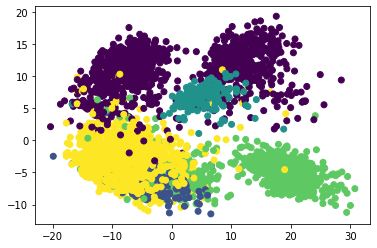

In [4]:
# SERM operation
sermOut = serm(data, Xpart, reduced_Dim, maxEPOCH, ROIsize, percOL)

# Visualization
serm_out = scipy.stats.zscore(sermOut)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(serm_out)

plt.scatter(pca_result[:,0],pca_result[:,1], c=groundTruth.flatten())